In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os

FOLDER_PATH = path = os.path.join("datasets", "food_demand")


def load_data(filename):
    file_path = os.path.join(FOLDER_PATH, filename)
    return pd.read_csv(file_path)


# Loading the data

In [6]:
center_info = load_data("fulfilment_center_info.csv")
meal_info = load_data("meal_info.csv")
train_data = load_data("train.csv")
test_data = load_data("test.csv")


# First look over the data

In [7]:
center_info


,center_id,city_code,region_code,center_type,op_area
0,11,679,56,TYPE_A,3.7
1,13,590,56,TYPE_B,6.7
2,124,590,56,TYPE_C,4.0
3,66,648,34,TYPE_A,4.1
4,94,632,34,TYPE_C,3.6
...,...,...,...,...,...
72,53,590,56,TYPE_A,3.8
73,30,604,56,TYPE_A,3.5
74,76,614,85,TYPE_A,3.0
75,68,676,34,TYPE_B,4.1


In [9]:
meal_info

,meal_id,category,cuisine
0,1885,Beverages,Thai
1,1993,Beverages,Thai
2,2539,Beverages,Thai
3,1248,Beverages,Indian
4,2631,Beverages,Indian
5,1311,Extras,Thai
6,1062,Beverages,Italian
7,1778,Beverages,Italian
8,1803,Extras,Thai
9,1198,Extras,Thai


In [10]:
train_data


,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders
0,1379560,1,55,1885,136.83,152.29,0,0,177
1,1466964,1,55,1993,136.83,135.83,0,0,270
2,1346989,1,55,2539,134.86,135.86,0,0,189
3,1338232,1,55,2139,339.50,437.53,0,0,54
4,1448490,1,55,2631,243.50,242.50,0,0,40
...,...,...,...,...,...,...,...,...,...
456543,1271326,145,61,1543,484.09,484.09,0,0,68
456544,1062036,145,61,2304,482.09,482.09,0,0,42
456545,1110849,145,61,2664,237.68,321.07,0,0,501
456546,1147725,145,61,2569,243.50,313.34,0,0,729


In [11]:
test_data


,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured
0,1028232,146,55,1885,158.11,159.11,0,0
1,1127204,146,55,1993,160.11,159.11,0,0
2,1212707,146,55,2539,157.14,159.14,0,0
3,1082698,146,55,2631,162.02,162.02,0,0
4,1400926,146,55,1248,163.93,163.93,0,0
...,...,...,...,...,...,...,...,...
32568,1250239,155,61,1543,482.09,484.09,0,0
32569,1039516,155,61,2304,483.09,483.09,0,0
32570,1158107,155,61,2664,322.07,323.07,0,0
32571,1444235,155,61,2569,322.07,323.07,0,0


# Checking for null values

In [12]:
center_info.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   center_id    77 non-null     int64  
 1   city_code    77 non-null     int64  
 2   region_code  77 non-null     int64  
 3   center_type  77 non-null     object 
 4   op_area      77 non-null     float64
dtypes: float64(1), int64(3), object(1)
memory usage: 3.1+ KB


In [13]:
meal_info.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   meal_id   51 non-null     int64 
 1   category  51 non-null     object
 2   cuisine   51 non-null     object
dtypes: int64(1), object(2)
memory usage: 1.3+ KB


In [14]:
train_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 456548 entries, 0 to 456547
Data columns (total 9 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   id                     456548 non-null  int64  
 1   week                   456548 non-null  int64  
 2   center_id              456548 non-null  int64  
 3   meal_id                456548 non-null  int64  
 4   checkout_price         456548 non-null  float64
 5   base_price             456548 non-null  float64
 6   emailer_for_promotion  456548 non-null  int64  
 7   homepage_featured      456548 non-null  int64  
 8   num_orders             456548 non-null  int64  
dtypes: float64(2), int64(7)
memory usage: 31.3 MB


In [15]:
test_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32573 entries, 0 to 32572
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     32573 non-null  int64  
 1   week                   32573 non-null  int64  
 2   center_id              32573 non-null  int64  
 3   meal_id                32573 non-null  int64  
 4   checkout_price         32573 non-null  float64
 5   base_price             32573 non-null  float64
 6   emailer_for_promotion  32573 non-null  int64  
 7   homepage_featured      32573 non-null  int64  
dtypes: float64(2), int64(6)
memory usage: 2.0 MB


# Check if every meal and center in the train/test datasets have entries

In [16]:
train_data["center_id"].value_counts()


13     7046
10     7015
52     6993
43     6970
67     6915
       ... 
139    4627
57     4501
162    4366
41     4083
91     3432
Name: center_id, Length: 77, dtype: int64

In [18]:
train_data['center_id'].isin(center_info['center_id']).value_counts()


True    456548
Name: center_id, dtype: int64

All center ids in the train set exist

In [19]:
test_data['center_id'].isin(center_info['center_id']).value_counts()


True    32573
Name: center_id, dtype: int64

All center ids in the test set exist

In [22]:
train_data['meal_id'].isin(meal_info['meal_id']).value_counts()


True    456548
Name: meal_id, dtype: int64

In [23]:
test_data['meal_id'].isin(meal_info['meal_id']).value_counts()


True    32573
Name: meal_id, dtype: int64

All meal ids in the test/train data exist

# Merging the train/test into one data frame by joining with the centers and meals

In [26]:
full_train_data = train_data.merge(center_info, on="center_id", how="inner")
full_train_data = full_train_data.merge(meal_info, on="meal_id", how="inner")

In [27]:
full_train_data

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,city_code,region_code,center_type,op_area,category,cuisine
0,1379560,1,55,1885,136.83,152.29,0,0,177,647,56,TYPE_C,2.0,Beverages,Thai
1,1018704,2,55,1885,135.83,152.29,0,0,323,647,56,TYPE_C,2.0,Beverages,Thai
2,1196273,3,55,1885,132.92,133.92,0,0,96,647,56,TYPE_C,2.0,Beverages,Thai
3,1116527,4,55,1885,135.86,134.86,0,0,163,647,56,TYPE_C,2.0,Beverages,Thai
4,1343872,5,55,1885,146.50,147.50,0,0,215,647,56,TYPE_C,2.0,Beverages,Thai
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
456543,1437396,141,61,2104,583.03,630.53,0,1,13,473,77,TYPE_A,4.5,Fish,Continental
456544,1060716,142,61,2104,581.03,582.03,0,0,42,473,77,TYPE_A,4.5,Fish,Continental
456545,1029231,143,61,2104,583.03,581.03,0,0,40,473,77,TYPE_A,4.5,Fish,Continental
456546,1141147,144,61,2104,582.03,581.03,0,0,53,473,77,TYPE_A,4.5,Fish,Continental


# Checking numerical values

In [29]:
full_train_data.describe()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,city_code,region_code,op_area
count,4.565480e+05,456548.000000,456548.000000,456548.000000,456548.000000,456548.000000,456548.000000,456548.00000,456548.000000,456548.000000,456548.000000,456548.000000
mean,1.250096e+06,74.768771,82.105796,2024.337458,332.238933,354.156627,0.081152,0.10920,261.872760,601.553399,56.614566,4.083590
std,1.443548e+05,41.524956,45.975046,547.420920,152.939723,160.715914,0.273069,0.31189,395.922798,66.195914,17.641306,1.091686
min,1.000000e+06,1.000000,10.000000,1062.000000,2.970000,55.350000,0.000000,0.00000,13.000000,456.000000,23.000000,0.900000
25%,1.124999e+06,39.000000,43.000000,1558.000000,228.950000,243.500000,0.000000,0.00000,54.000000,553.000000,34.000000,3.600000
50%,1.250184e+06,76.000000,76.000000,1993.000000,296.820000,310.460000,0.000000,0.00000,136.000000,596.000000,56.000000,4.000000
75%,1.375140e+06,111.000000,110.000000,2539.000000,445.230000,458.870000,0.000000,0.00000,324.000000,651.000000,77.000000,4.500000
max,1.499999e+06,145.000000,186.000000,2956.000000,866.270000,866.270000,1.000000,1.00000,24299.000000,713.000000,93.000000,7.000000


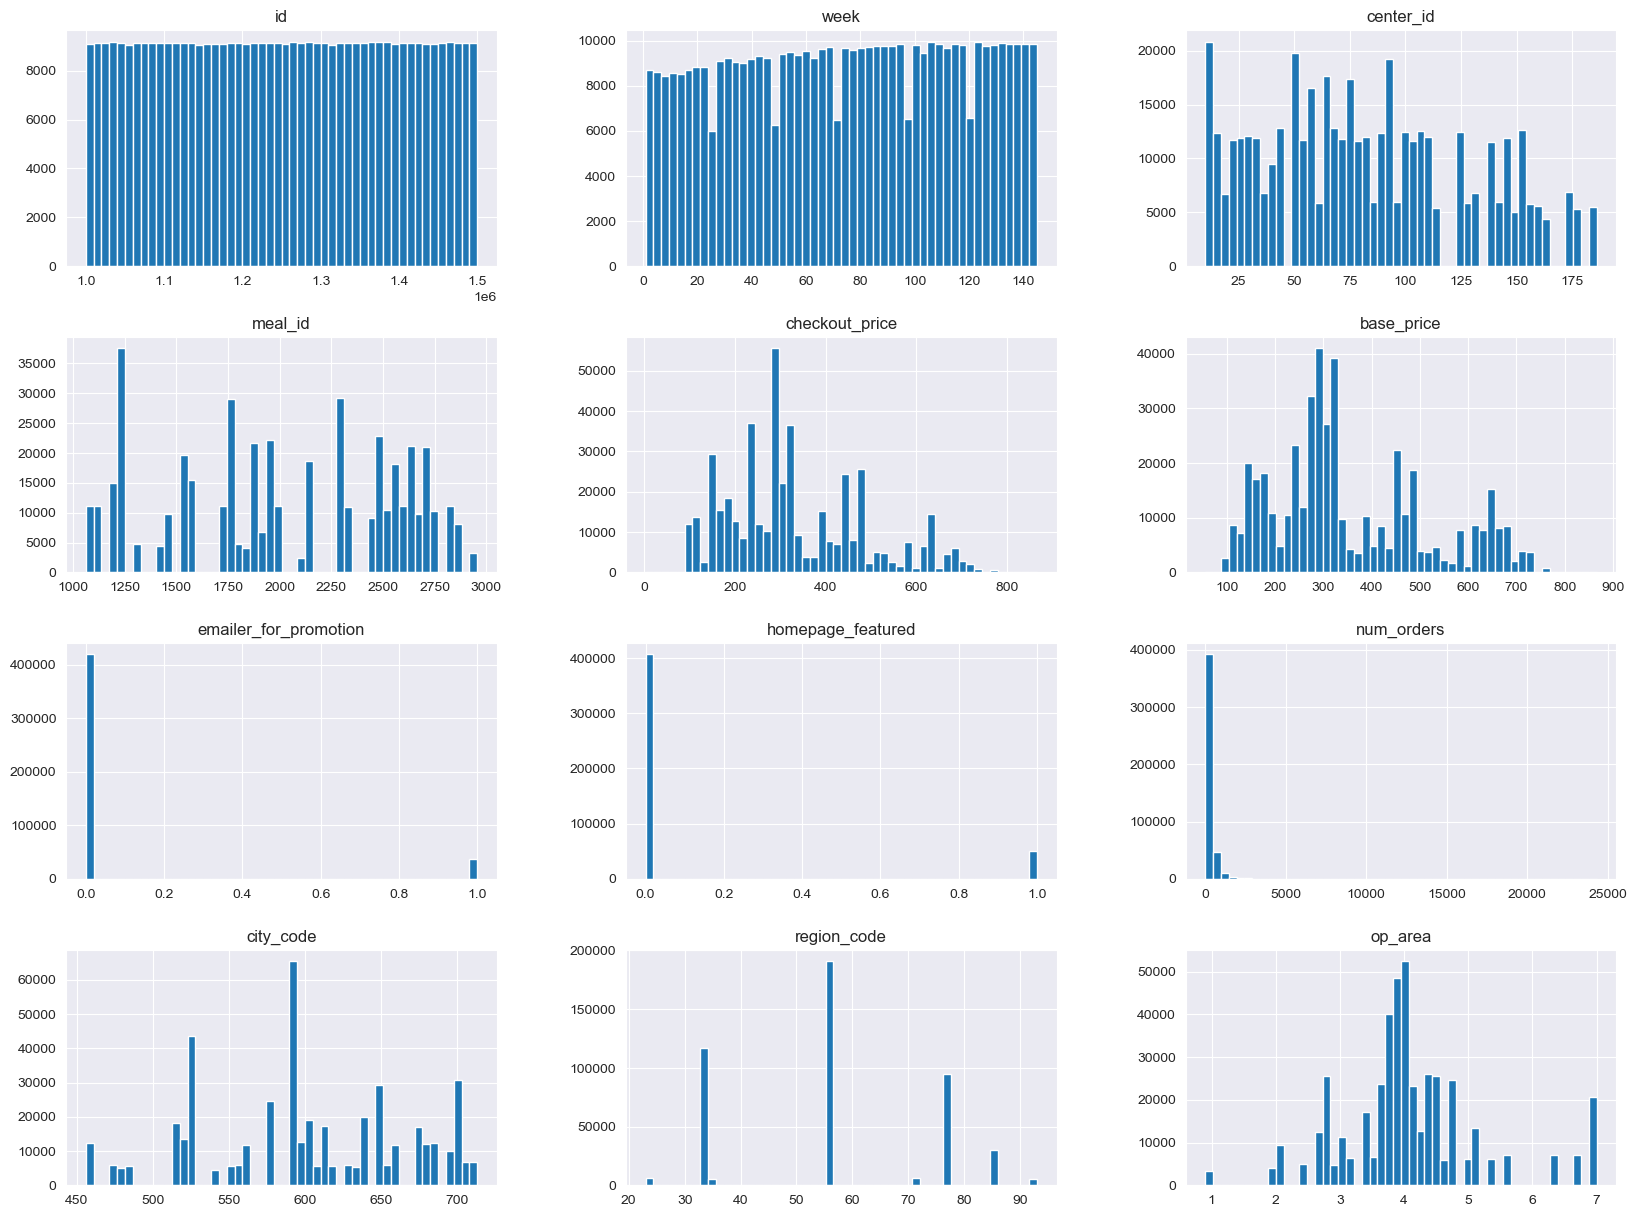

In [30]:
full_train_data.hist(bins=50, figsize=(20, 15))
plt.show()


# Check correlations with number of sales

In [32]:
correlations = full_train_data.corr(numeric_only=True)


In [34]:
correlations["num_orders"]


id                       0.000702
week                    -0.017210
center_id               -0.053035
meal_id                  0.010597
checkout_price          -0.282108
base_price              -0.222306
emailer_for_promotion    0.277147
homepage_featured        0.294490
num_orders               1.000000
city_code                0.041596
region_code              0.029744
op_area                  0.176976
Name: num_orders, dtype: float64

# Insights:
Highest positive correlations are with homepage_features and emails_for promotion.
Makes sense, if the meal is marketed either on the website or through an email, the nr of orders increases.
Op Area also makes sense. If the center covers a bigger area, the nr of orders increases.

Best negative correlations are for the base_price and the checkout_price.
Self-explanatory,  if prices are cheaper, more orders appear.

array([[<Axes: xlabel='num_orders', ylabel='num_orders'>,
        <Axes: xlabel='base_price', ylabel='num_orders'>,
        <Axes: xlabel='checkout_price', ylabel='num_orders'>],
       [<Axes: xlabel='num_orders', ylabel='base_price'>,
        <Axes: xlabel='base_price', ylabel='base_price'>,
        <Axes: xlabel='checkout_price', ylabel='base_price'>],
       [<Axes: xlabel='num_orders', ylabel='checkout_price'>,
        <Axes: xlabel='base_price', ylabel='checkout_price'>,
        <Axes: xlabel='checkout_price', ylabel='checkout_price'>]],
      dtype=object)

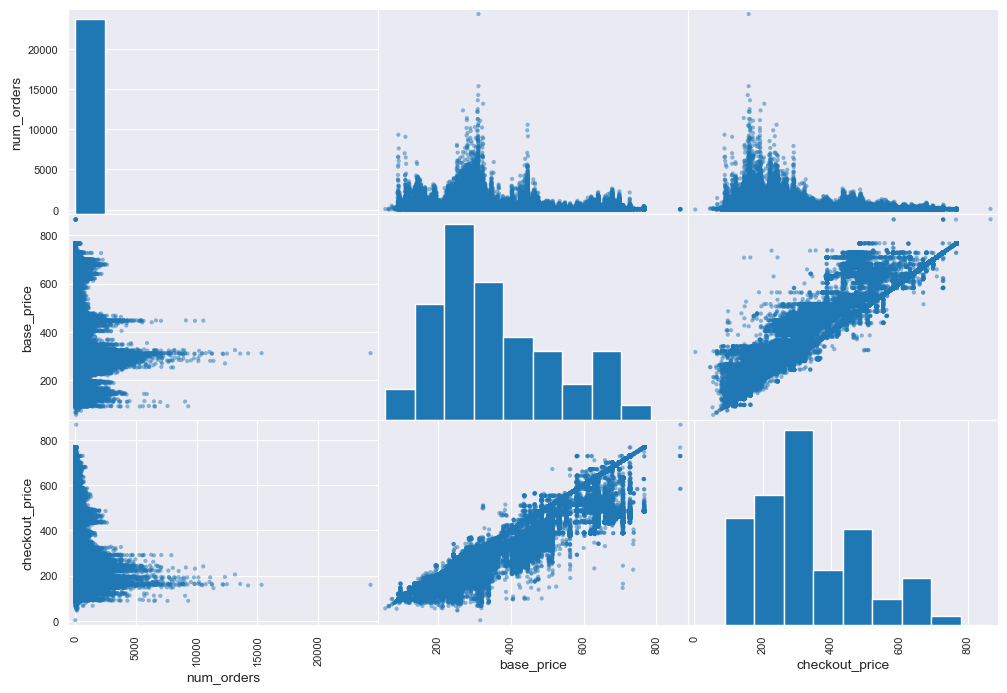

In [36]:
from pandas.plotting import scatter_matrix

attributes = ["num_orders", "base_price", "checkout_price"]
scatter_matrix(full_train_data[attributes], figsize=(12, 8))

In [41]:
nr_order_by_week = full_train_data.groupby(["week"])["num_orders"].sum()
nr_order_by_week

week
1       792261
2       787084
3       695262
4       743529
5      1198675
        ...   
141     776240
142     739661
143     759926
144     801197
145     671926
Name: num_orders, Length: 145, dtype: int64

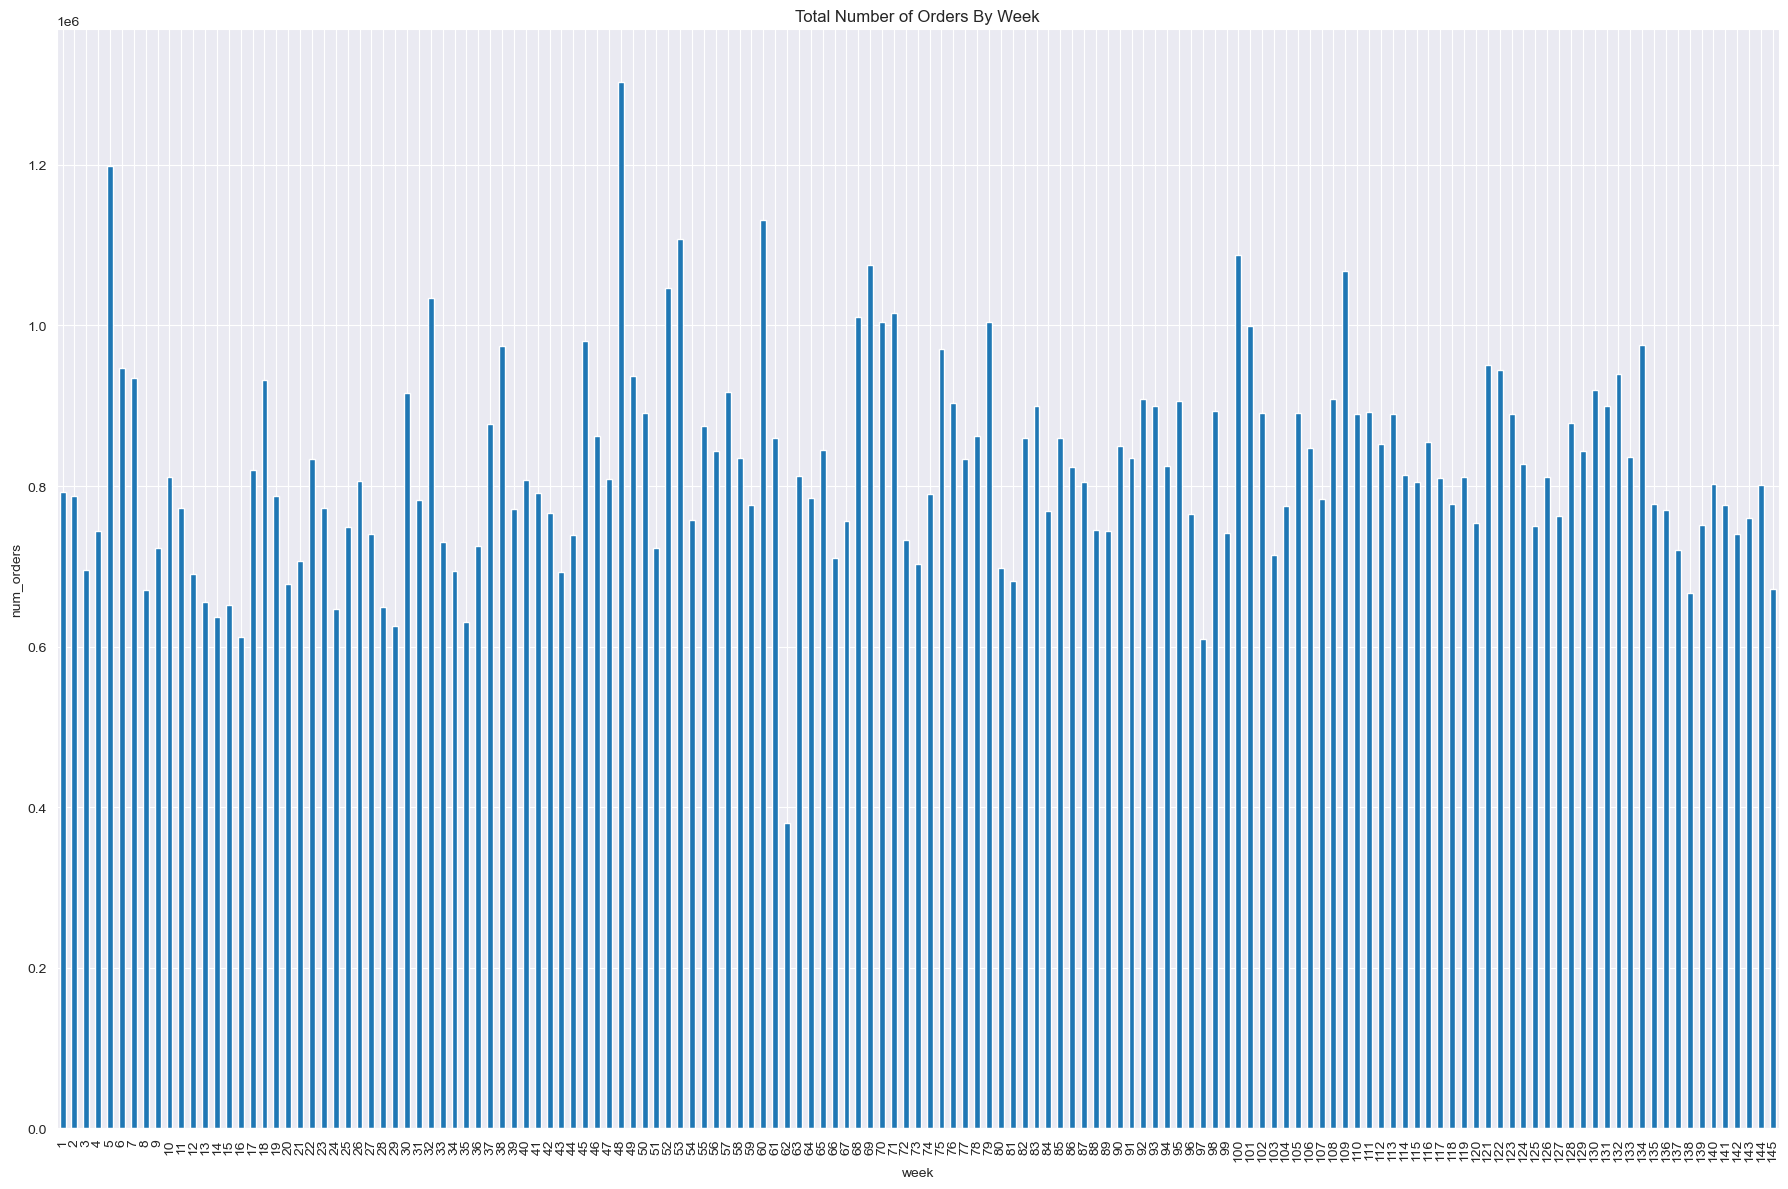

In [47]:
#plot the total profit over the years
plt.figure(figsize=(18, 12))
nr_order_by_week.plot(kind='bar')
plt.title('Total Number of Orders By Week')
plt.xlabel('week')
plt.ylabel('num_orders')
plt.xticks(rotation=90) # text rotation on the x axis
plt.tight_layout()
plt.show()


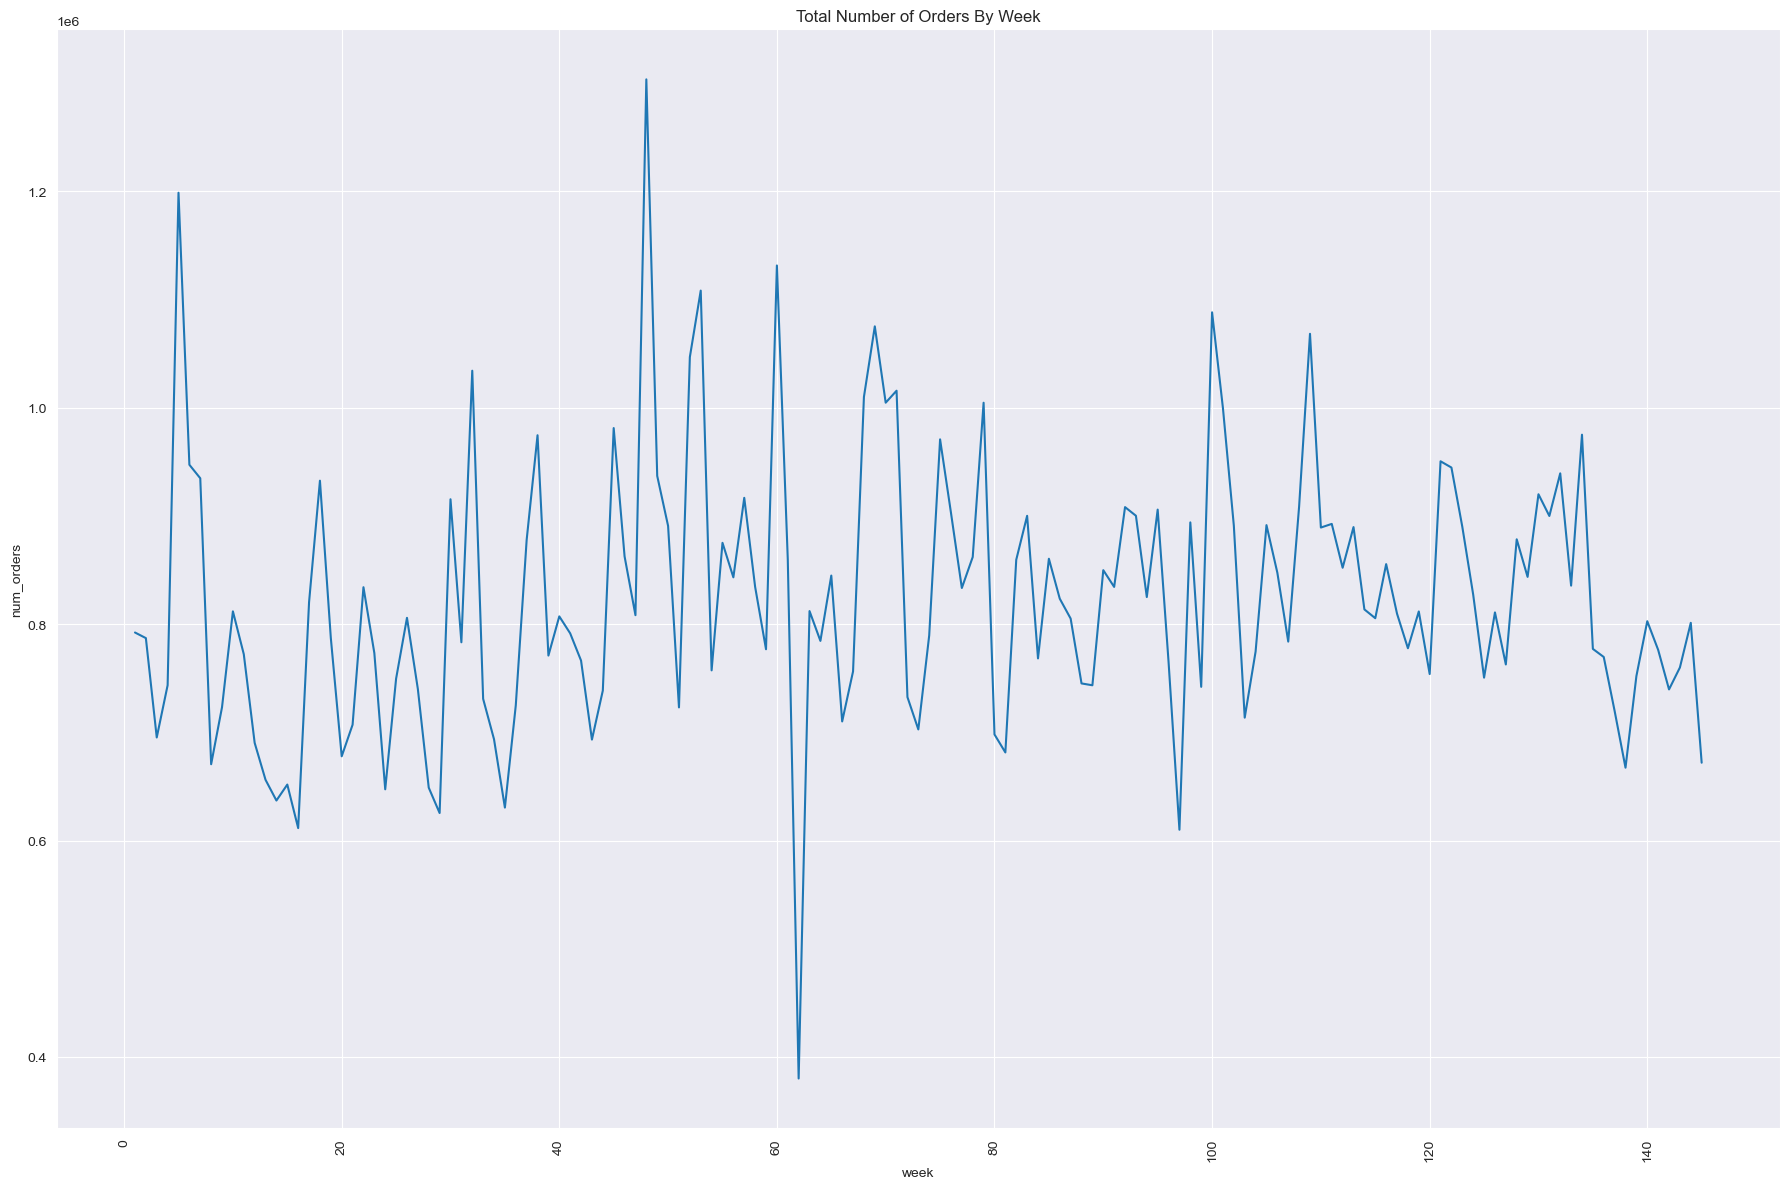

In [48]:
plt.figure(figsize=(18, 12))
nr_order_by_week.plot(kind='line')
plt.title('Total Number of Orders By Week')
plt.xlabel('week')
plt.ylabel('num_orders')
plt.xticks(rotation=90) # text rotation on the x axis
plt.tight_layout()
plt.show()


In [49]:
full_train_data.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 456548 entries, 0 to 456547
Data columns (total 15 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   id                     456548 non-null  int64  
 1   week                   456548 non-null  int64  
 2   center_id              456548 non-null  int64  
 3   meal_id                456548 non-null  int64  
 4   checkout_price         456548 non-null  float64
 5   base_price             456548 non-null  float64
 6   emailer_for_promotion  456548 non-null  int64  
 7   homepage_featured      456548 non-null  int64  
 8   num_orders             456548 non-null  int64  
 9   city_code              456548 non-null  int64  
 10  region_code            456548 non-null  int64  
 11  center_type            456548 non-null  object 
 12  op_area                456548 non-null  float64
 13  category               456548 non-null  object 
 14  cuisine                456548 non-nu

In [50]:
nr_order_by_center = full_train_data.groupby(["center_id"])["num_orders"].sum()
nr_order_by_center


center_id
10     3381018
11     2797300
13     4296545
14     1195108
17     1218319
        ...   
161     813948
162     680255
174    2792587
177    1021177
186     846982
Name: num_orders, Length: 77, dtype: int64

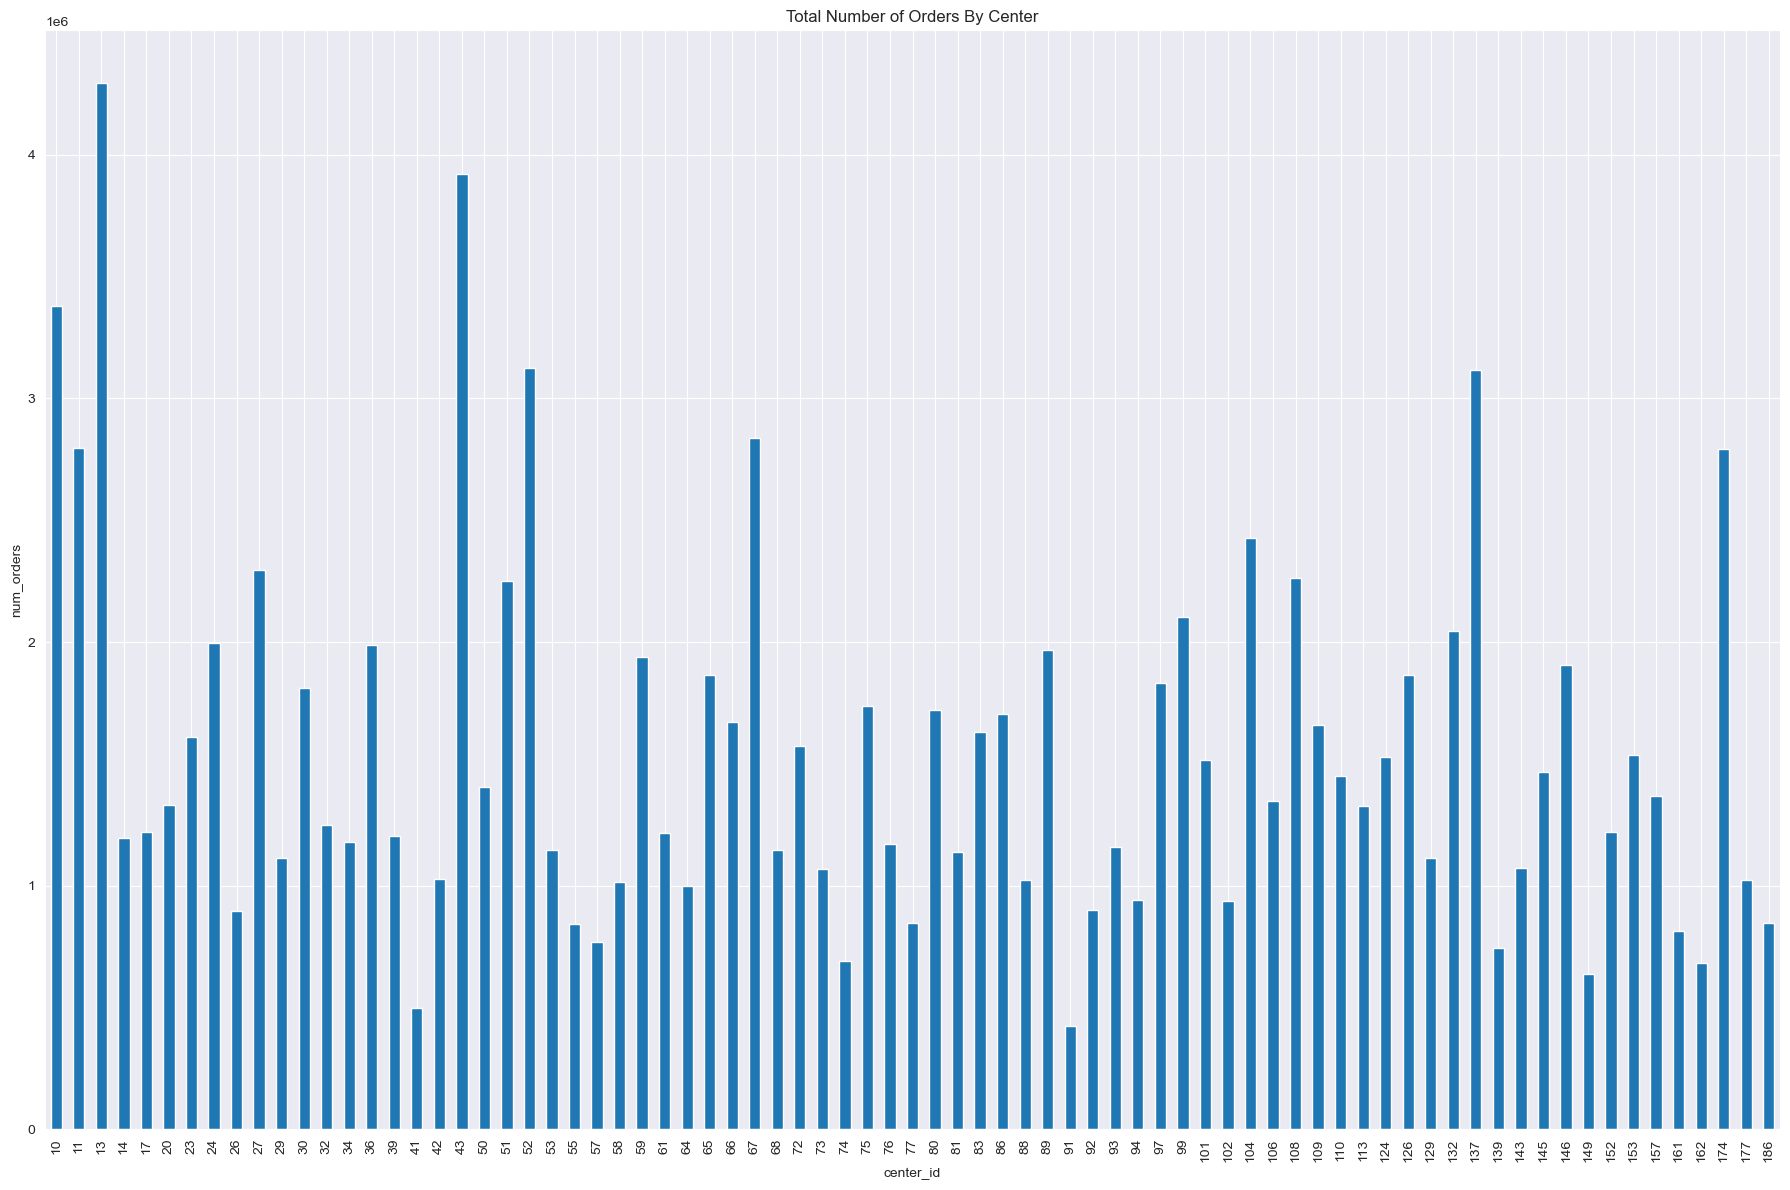

In [51]:
#plot the total profit over the years
plt.figure(figsize=(18, 12))
nr_order_by_center.plot(kind='bar')
plt.title('Total Number of Orders By Center')
plt.xlabel('center_id')
plt.ylabel('num_orders')
plt.xticks(rotation=90) # text rotation on the x axis
plt.tight_layout()
plt.show()


In [52]:
nr_order_by_center_type = full_train_data.groupby(["center_type"])["num_orders"].sum()
nr_order_by_center_type


center_type
TYPE_A    68978517
TYPE_B    29996073
TYPE_C    20582895
Name: num_orders, dtype: int64

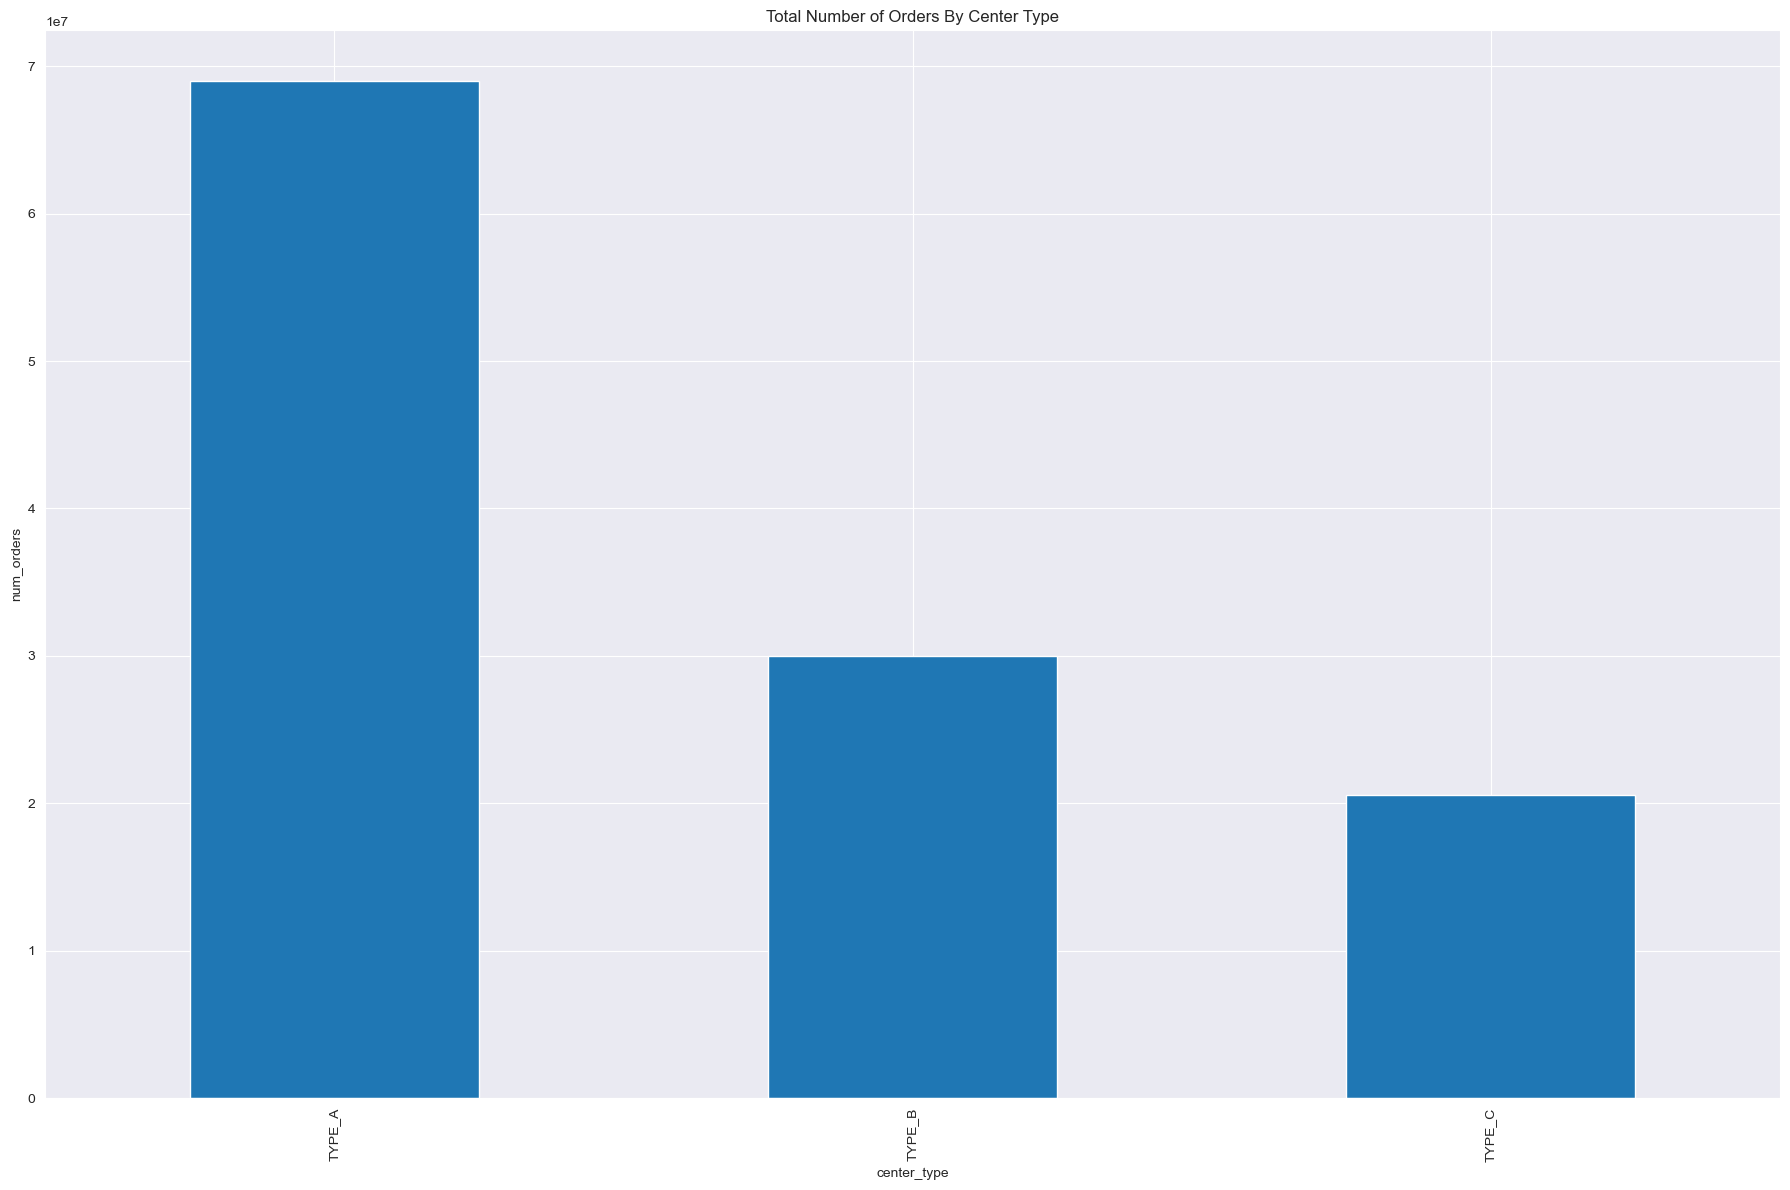

In [53]:
#plot the total profit over the years
plt.figure(figsize=(18, 12))
nr_order_by_center_type.plot(kind='bar')
plt.title('Total Number of Orders By Center Type')
plt.xlabel('center_type')
plt.ylabel('num_orders')
plt.xticks(rotation=90) # text rotation on the x axis
plt.tight_layout()
plt.show()


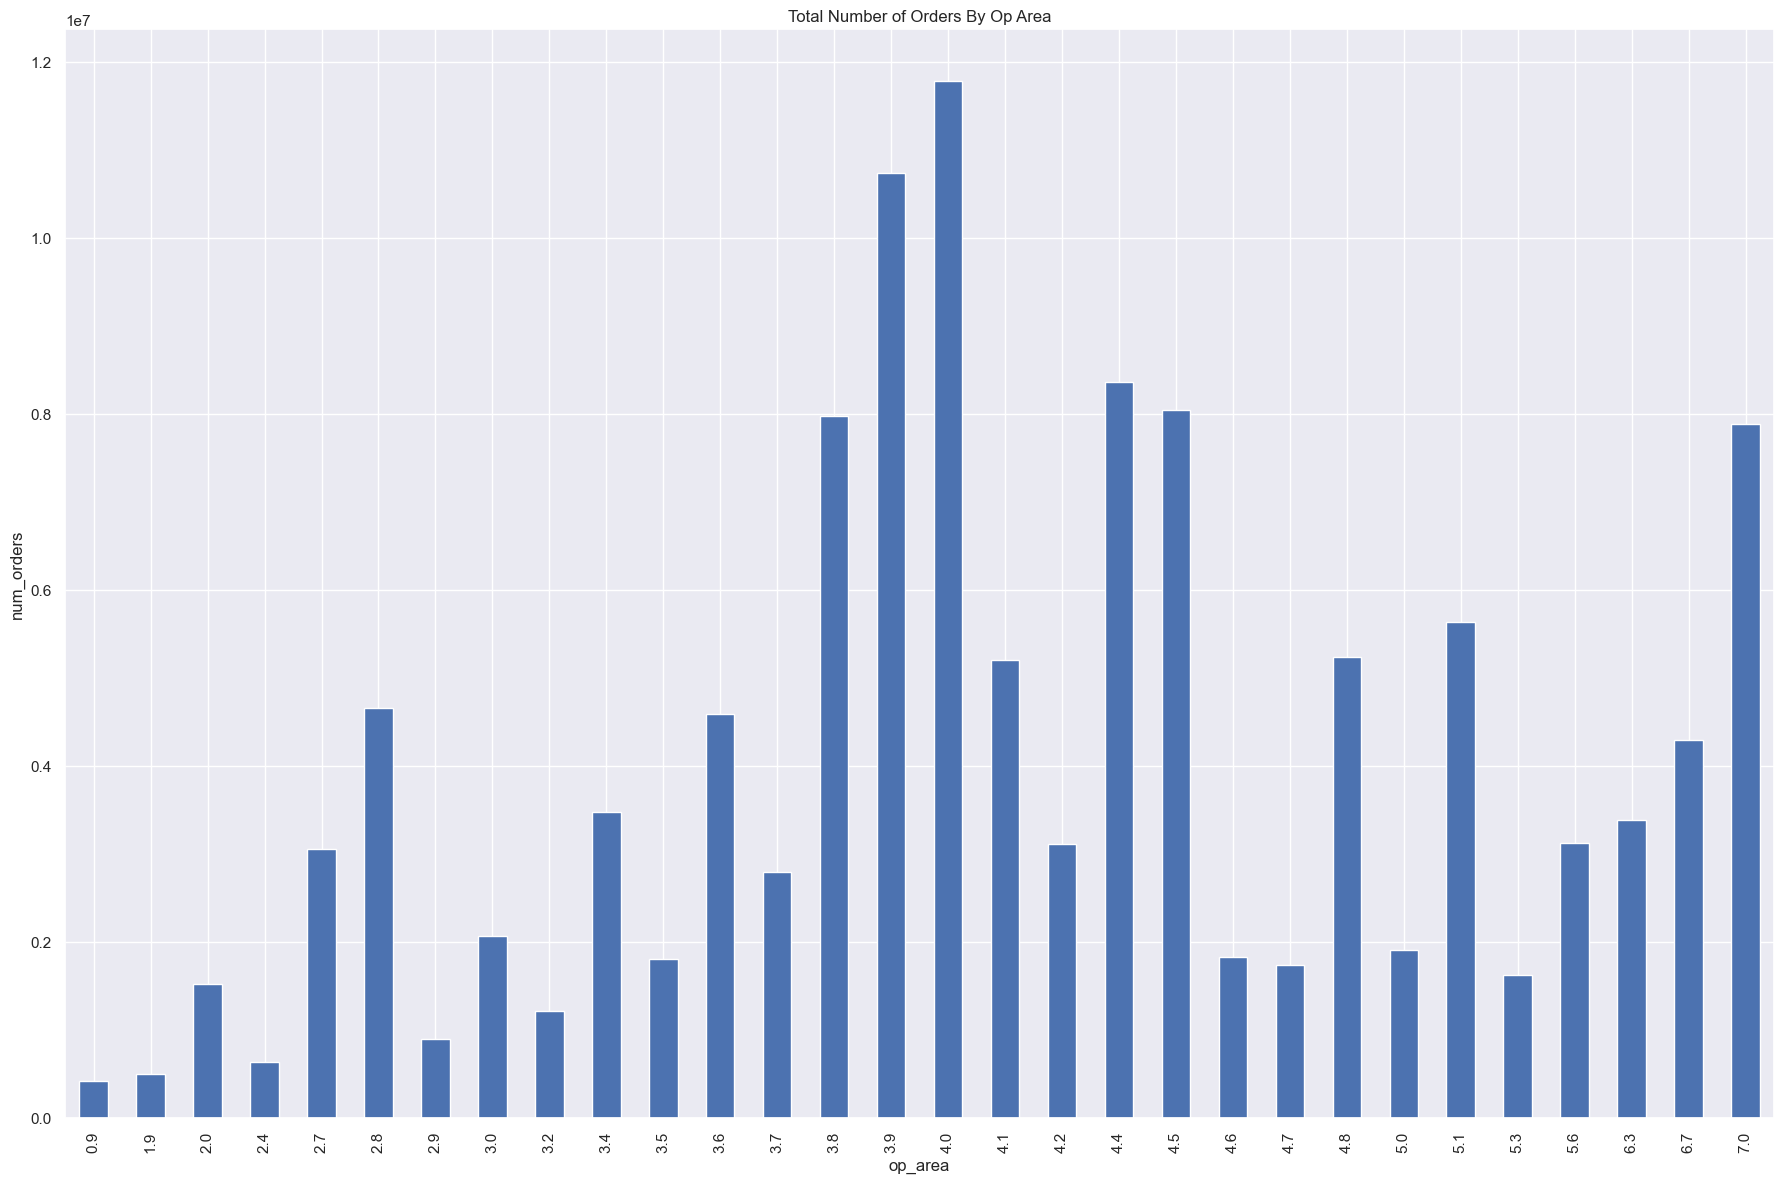

In [133]:
nr_order_by_op_area = full_train_data.groupby(["op_area"])["num_orders"].sum()
plt.figure(figsize=(18, 12))
nr_order_by_op_area.plot(kind='bar')
plt.title('Total Number of Orders By Op Area')
plt.xlabel('op_area')
plt.ylabel('num_orders')
plt.xticks(rotation=90) # text rotation on the x axis
plt.tight_layout()
plt.show()

## Type A Centers perform much better than Type B. We'll need to understand why.


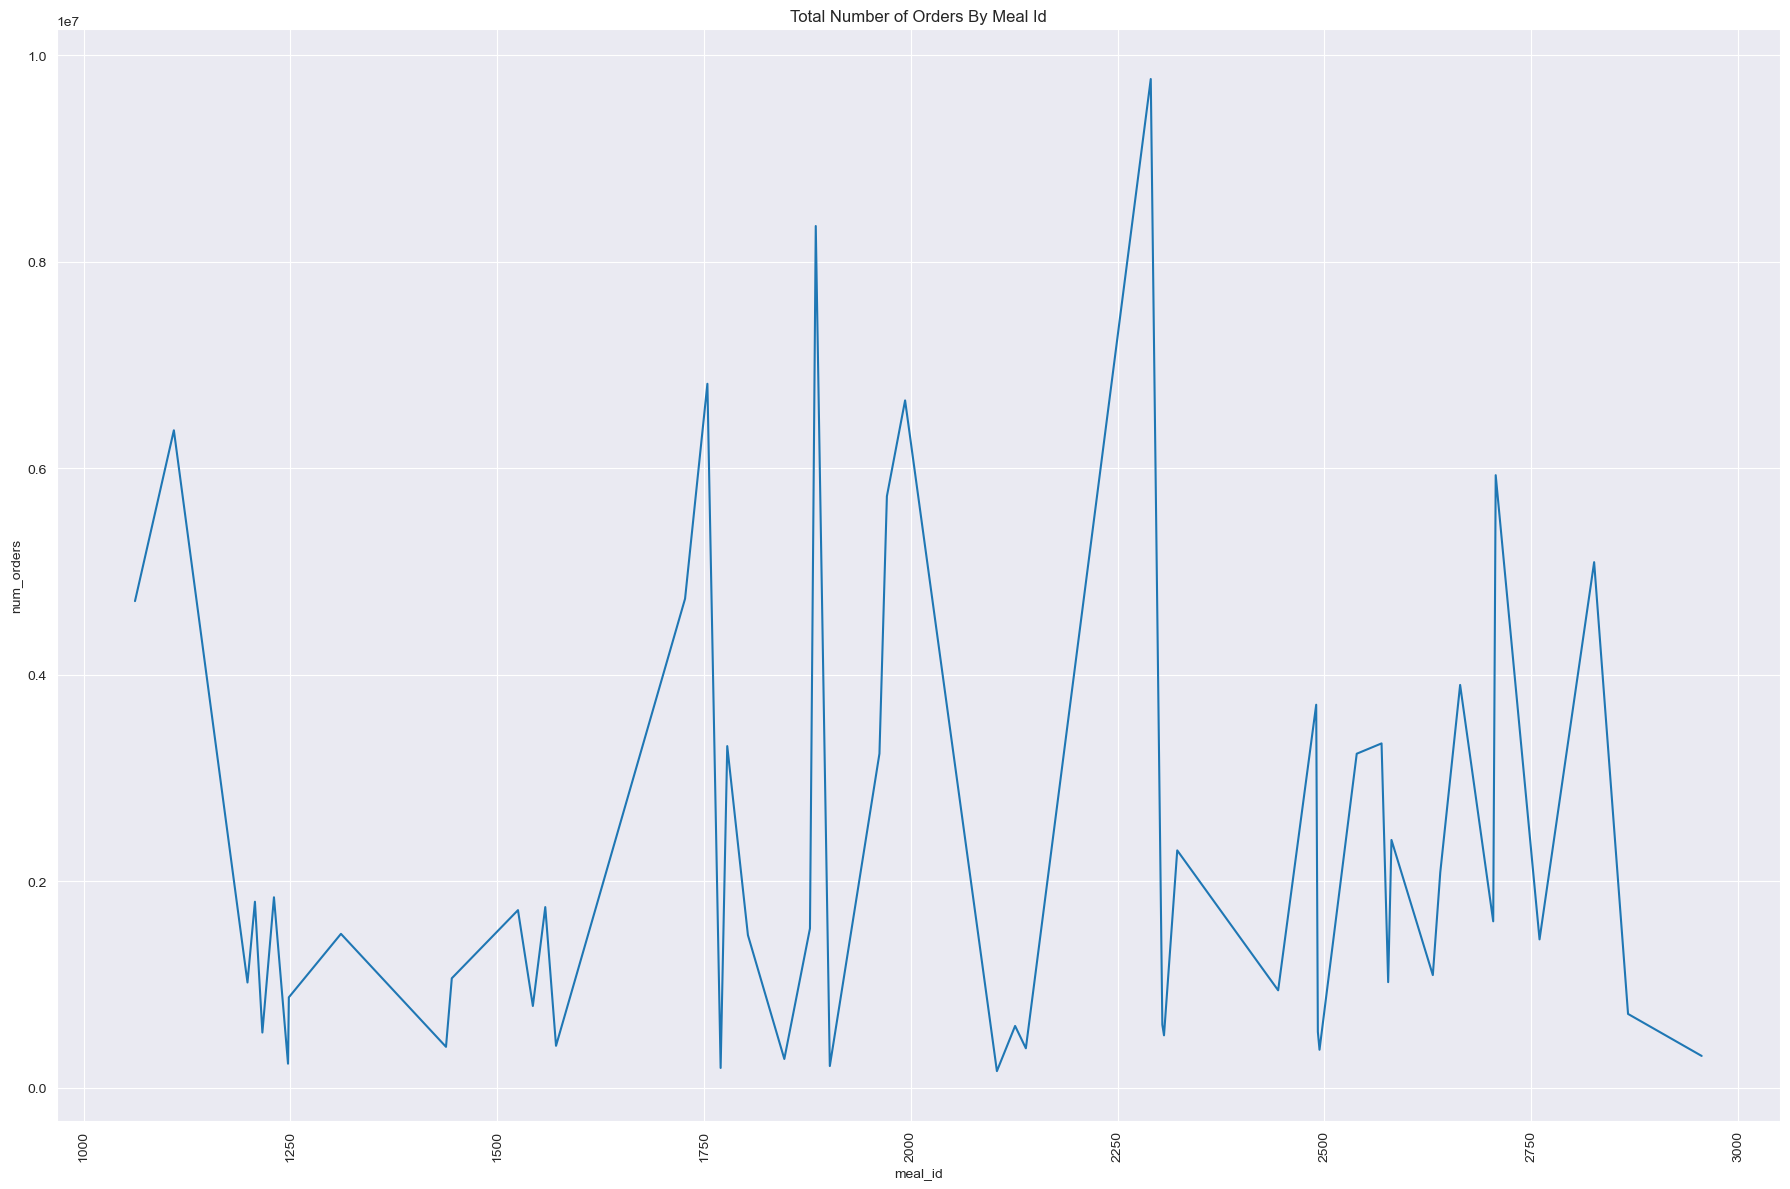

In [54]:
nr_order_by_meal = full_train_data.groupby(["meal_id"])["num_orders"].sum()
plt.figure(figsize=(18, 12))
nr_order_by_meal.plot(kind='line')
plt.title('Total Number of Orders By Meal Id')
plt.xlabel('meal_id')
plt.ylabel('num_orders')
plt.xticks(rotation=90) # text rotation on the x axis
plt.tight_layout()
plt.show()


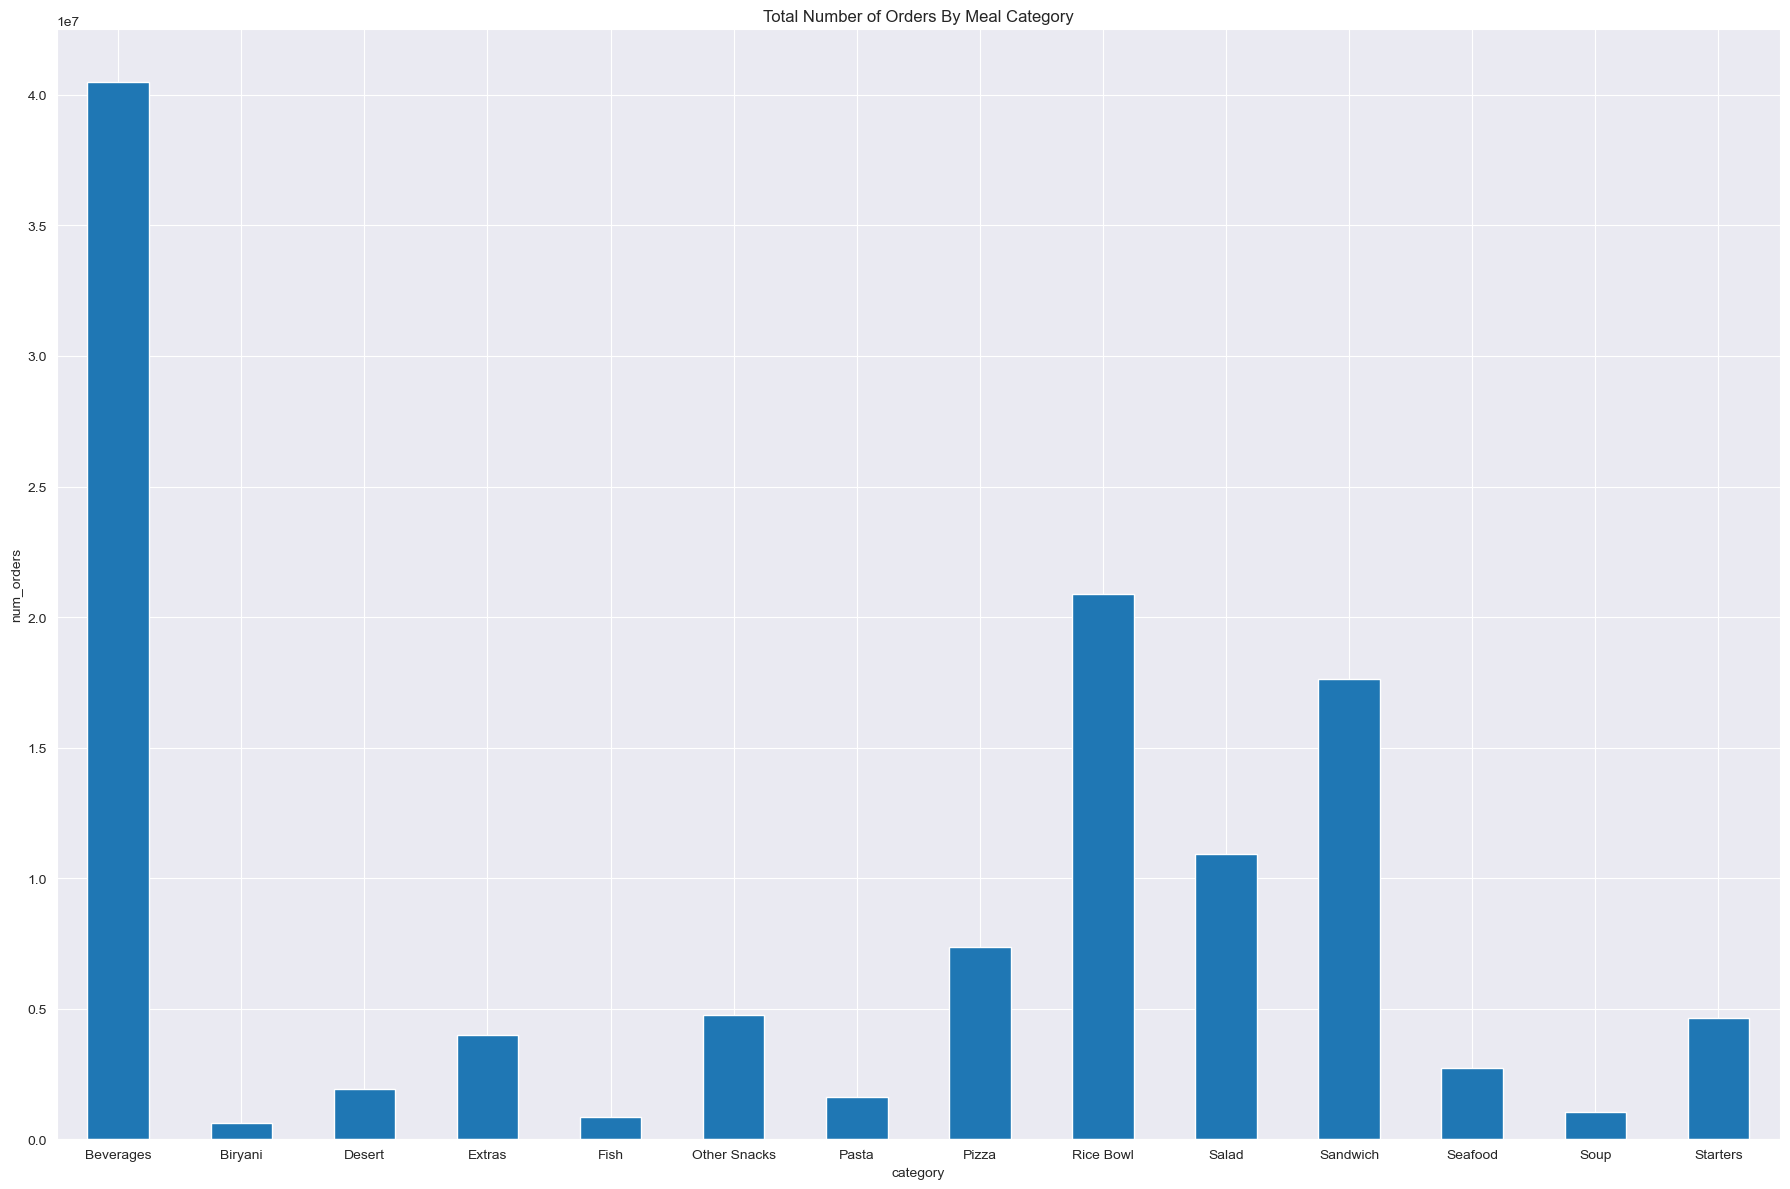

In [59]:
nr_order_by_meal_category = full_train_data.groupby(["category"])["num_orders"].sum()
plt.figure(figsize=(18, 12))
nr_order_by_meal_category.plot(kind='bar')
plt.title('Total Number of Orders By Meal Category')
plt.xlabel('category')
plt.ylabel('num_orders')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


## Some categories sell much better than others: Beverages win by a lot, followed by Rice Bowls and Sandwiches

# Checking some other connections

## Are Type_A centers selling better because of Type_A or because they maybe selling more Beverages or other well selling meal cateogries?

Let's look at the order totals for each center_type/category combination

In [113]:
full_train_data.groupby(["center_type", "category"])["num_orders"].sum()


center_type  category    
TYPE_A       Beverages       24633857
             Biryani           348112
             Desert           1006575
             Extras           2385158
             Fish              468892
             Other Snacks     2721316
             Pasta             893619
             Pizza            4178759
             Rice Bowl       11847850
             Salad            5773622
             Sandwich         9844003
             Seafood          1624714
             Soup              612597
             Starters         2639443
TYPE_B       Beverages        9340360
             Biryani           228273
             Desert            597142
             Extras           1251120
             Fish              375444
             Other Snacks     1755359
             Pasta             530987
             Pizza            1585932
             Rice Bowl        5519104
             Salad            2269206
             Sandwich         3760525
             Seafood    

Good info, but we need it in a visual way to understand better.
Let's plot these values grouped by center type and category. We expect to see that Type A bars will outperform the rest of the center types because we know Type A sells much more than the others.

<Axes: xlabel='center_type', ylabel='num_orders'>

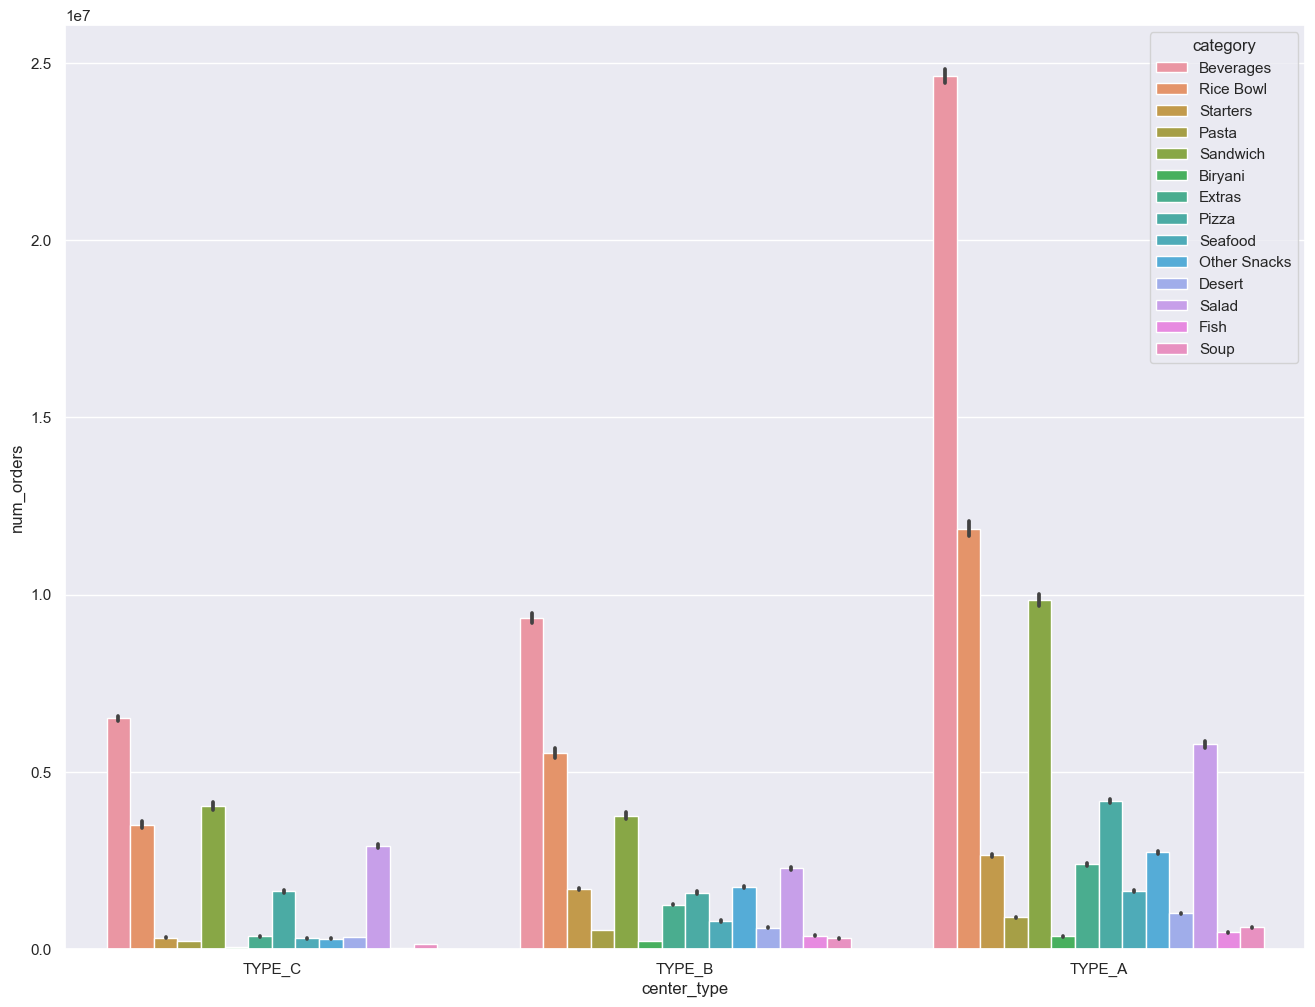

In [114]:
import seaborn as sns

sns.set(rc={'figure.figsize':(16,12)})
sns.barplot(x="center_type", y="num_orders", hue="category", data=full_train_data, estimator="sum")

OBSERVATIONS:
As we assumed, Type A categories outperform those respective categories from other center types.
Just eyeballing it, we can see that even though Type A sells much more than the others, it sells each category in a similar proportion to the rest.
Eyeballing is not enough, let's check the data.

## Are the percentages of categories sold in Type A very different that in the other types? Does type A sell many more Beverages compared to it's total sales?
## We want to understand if the better performance of Type A is due to it selling meals from a better sold category or if it sells about the same as the other center types in % amount. This will help us understand if the center_type is actually relevant or if the difference in sales for the center_type is due to the meal categories sold.

Basically, we want to calculate the % of sales from the total for each center_type/category combination.
To do this, we first need for each center_type/category combination the total number of orders.

In [115]:
grouped_data_category = full_train_data.groupby(['center_type', 'category'])['num_orders'].sum().reset_index()
grouped_data_category


,center_type,category,num_orders
0,TYPE_A,Beverages,24633857
1,TYPE_A,Biryani,348112
2,TYPE_A,Desert,1006575
3,TYPE_A,Extras,2385158
4,TYPE_A,Fish,468892
5,TYPE_A,Other Snacks,2721316
6,TYPE_A,Pasta,893619
7,TYPE_A,Pizza,4178759
8,TYPE_A,Rice Bowl,11847850
9,TYPE_A,Salad,5773622


No we have the total orders for each center_type/category. To calculate the % we first need to know the total nr of orders sold for each center_type regardless of the categories. We create a different dataset for this.

In [116]:
total_orders_by_center = full_train_data.groupby(['center_type'])['num_orders'].sum().reset_index()
total_orders_by_center


,center_type,num_orders
0,TYPE_A,68978517
1,TYPE_B,29996073
2,TYPE_C,20582895


Perfect. Now we could calculate the percentage going line by line and looking into the above dataset to find the total, but it's more performant to use pandas. For this we need to add to all the center_type/category combinations, the total nr of orders for that center_type.

In [117]:
grouped_data_category = grouped_data_category.merge(total_orders_by_center, on='center_type', suffixes=('', '_total'))
grouped_data_category


,center_type,category,num_orders,num_orders_total
0,TYPE_A,Beverages,24633857,68978517
1,TYPE_A,Biryani,348112,68978517
2,TYPE_A,Desert,1006575,68978517
3,TYPE_A,Extras,2385158,68978517
4,TYPE_A,Fish,468892,68978517
5,TYPE_A,Other Snacks,2721316,68978517
6,TYPE_A,Pasta,893619,68978517
7,TYPE_A,Pizza,4178759,68978517
8,TYPE_A,Rice Bowl,11847850,68978517
9,TYPE_A,Salad,5773622,68978517


Now that we have everything we need to calculate the percentage in the `grouped_data` dataset, we can use Pandas to apply a "regula de 3 simpla" formula:
`num_orders / num_orders+total * 100`

In [118]:
grouped_data_category["percentage"] = grouped_data_category["num_orders"] / grouped_data_category["num_orders_total"] * 100


In [119]:
grouped_data_category


,center_type,category,num_orders,num_orders_total,percentage
0,TYPE_A,Beverages,24633857,68978517,35.712361
1,TYPE_A,Biryani,348112,68978517,0.504667
2,TYPE_A,Desert,1006575,68978517,1.459259
3,TYPE_A,Extras,2385158,68978517,3.457827
4,TYPE_A,Fish,468892,68978517,0.679765
5,TYPE_A,Other Snacks,2721316,68978517,3.945165
6,TYPE_A,Pasta,893619,68978517,1.295503
7,TYPE_A,Pizza,4178759,68978517,6.058059
8,TYPE_A,Rice Bowl,11847850,68978517,17.176145
9,TYPE_A,Salad,5773622,68978517,8.370174


Now, we just need to plot the data

<Axes: xlabel='center_type', ylabel='percentage'>

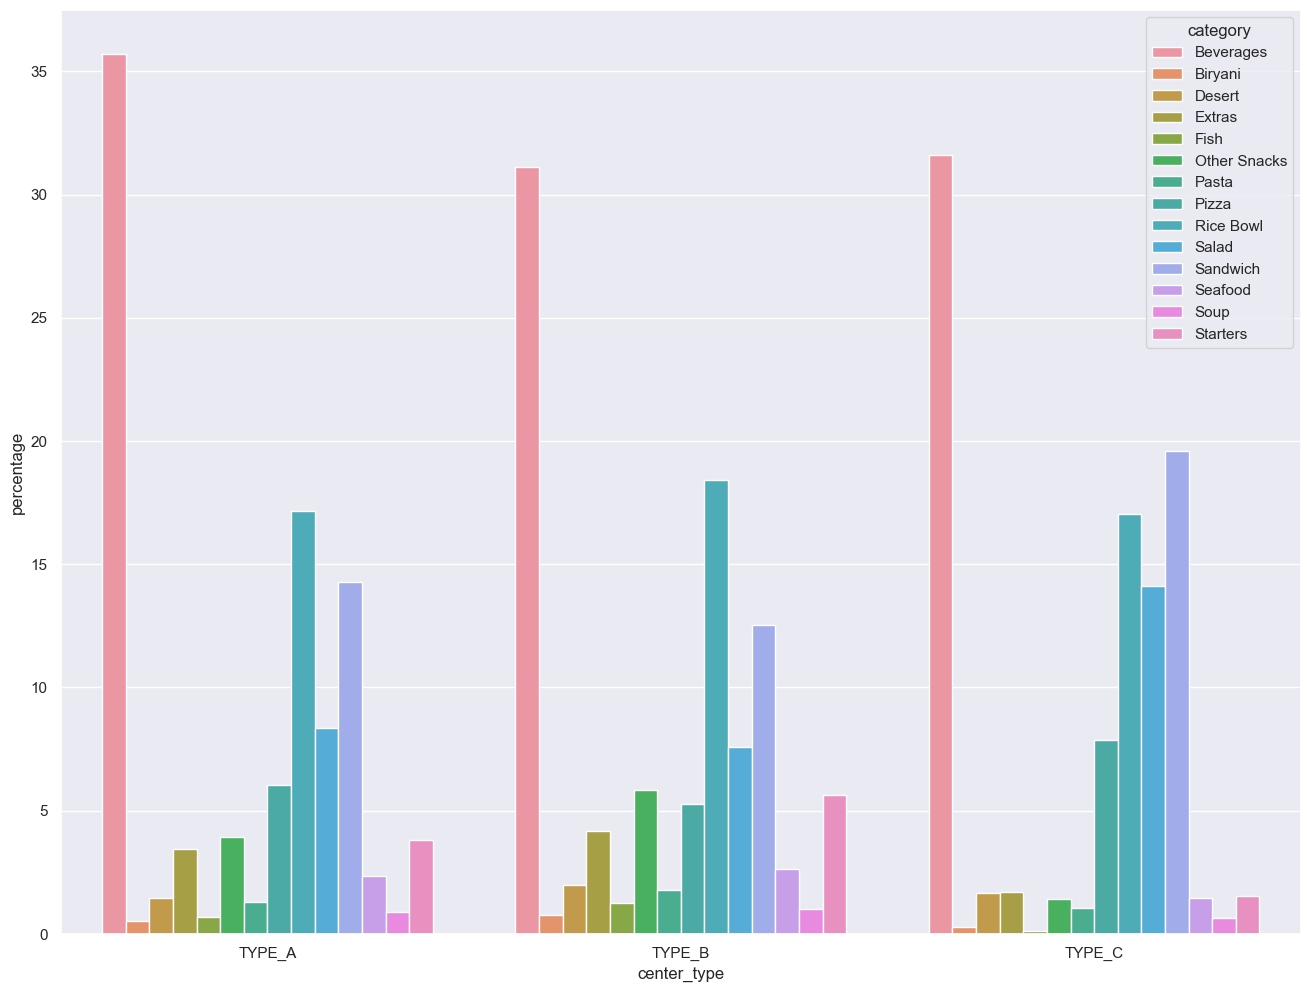

In [120]:
sns.barplot(x="center_type", y="percentage", hue="category", data=grouped_data_category)


OBSERVATIONS:
Given that the percentages for each category is very similar between the center_types it's safe to assume that category does not have a correlation with the high number of orders sold in Type A, and basically a higher Type like Type A or Type B means that that center will sell more.
So far, center_type seems like a very important feature to include in the ML training.

In [121]:
full_train_data.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 456548 entries, 0 to 456547
Data columns (total 15 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   id                     456548 non-null  int64  
 1   week                   456548 non-null  int64  
 2   center_id              456548 non-null  int64  
 3   meal_id                456548 non-null  int64  
 4   checkout_price         456548 non-null  float64
 5   base_price             456548 non-null  float64
 6   emailer_for_promotion  456548 non-null  int64  
 7   homepage_featured      456548 non-null  int64  
 8   num_orders             456548 non-null  int64  
 9   city_code              456548 non-null  int64  
 10  region_code            456548 non-null  int64  
 11  center_type            456548 non-null  object 
 12  op_area                456548 non-null  float64
 13  category               456548 non-null  object 
 14  cuisine                456548 non-nu

# Are Type_A centers selling better because of Type_A or because they all have higher op_area?

Let's check center_type/op_area order totals.

In [122]:
total_orders_by_center_area = full_train_data.groupby(['center_type', "op_area"])['num_orders'].sum().reset_index()
total_orders_by_center_area


,center_type,op_area,num_orders
0,TYPE_A,2.4,637527
1,TYPE_A,2.7,1863012
2,TYPE_A,2.8,1629626
3,TYPE_A,3.0,1168739
4,TYPE_A,3.2,1218319
5,TYPE_A,3.4,3478065
6,TYPE_A,3.5,1812167
7,TYPE_A,3.6,1659568
8,TYPE_A,3.7,2797300
9,TYPE_A,3.8,4688724


Nothing to understand. Let's plot it.

<Axes: xlabel='center_type', ylabel='num_orders'>

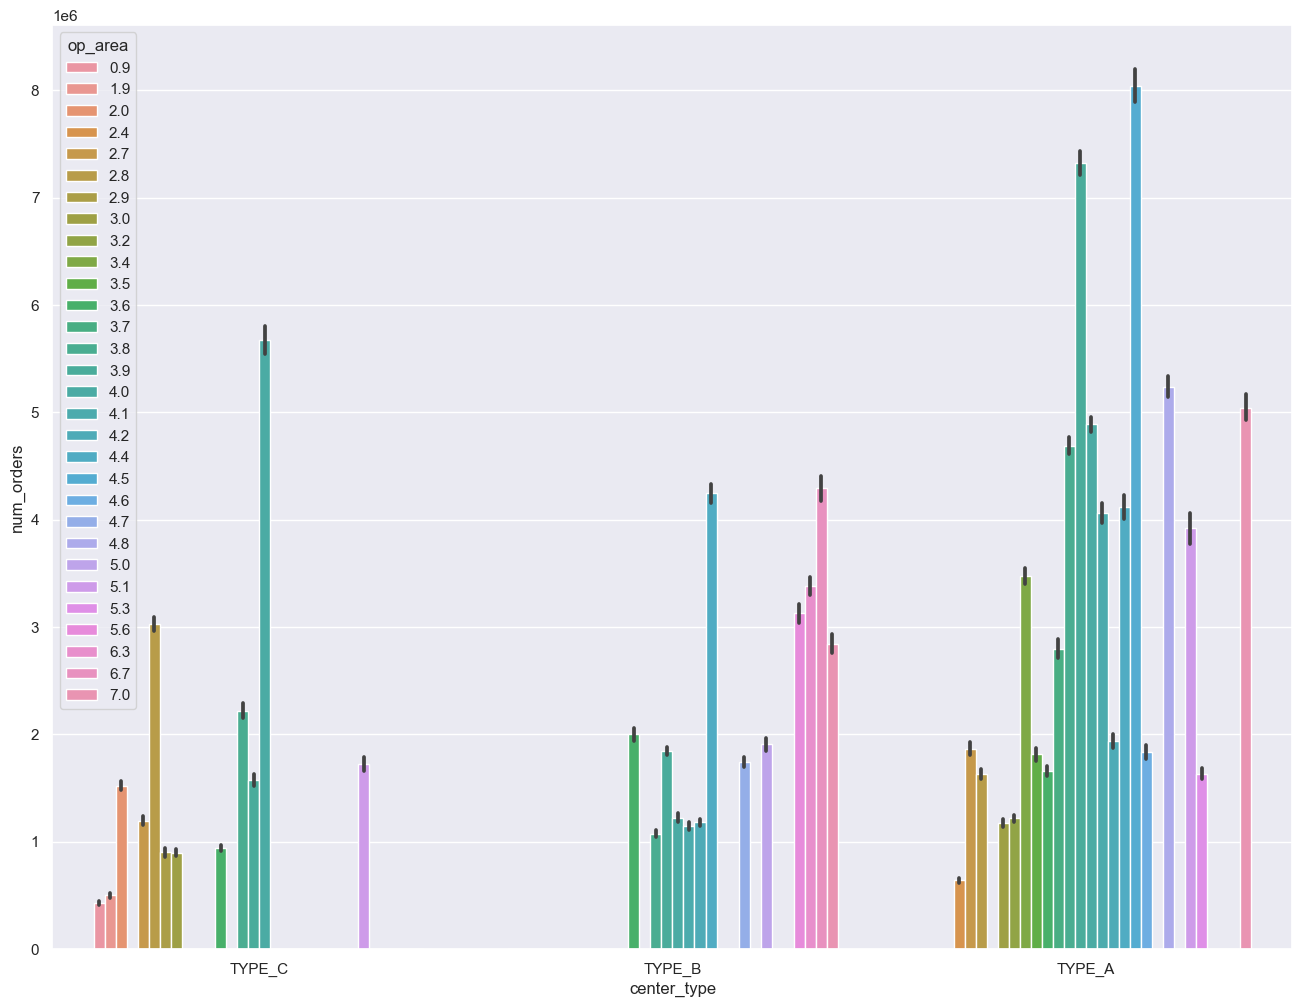

In [123]:
sns.set(rc={'figure.figsize':(16,12)})
sns.barplot(x="center_type", y="num_orders", hue="op_area", data=full_train_data, estimator="sum")


<Axes: xlabel='center_type', ylabel='percentage'>

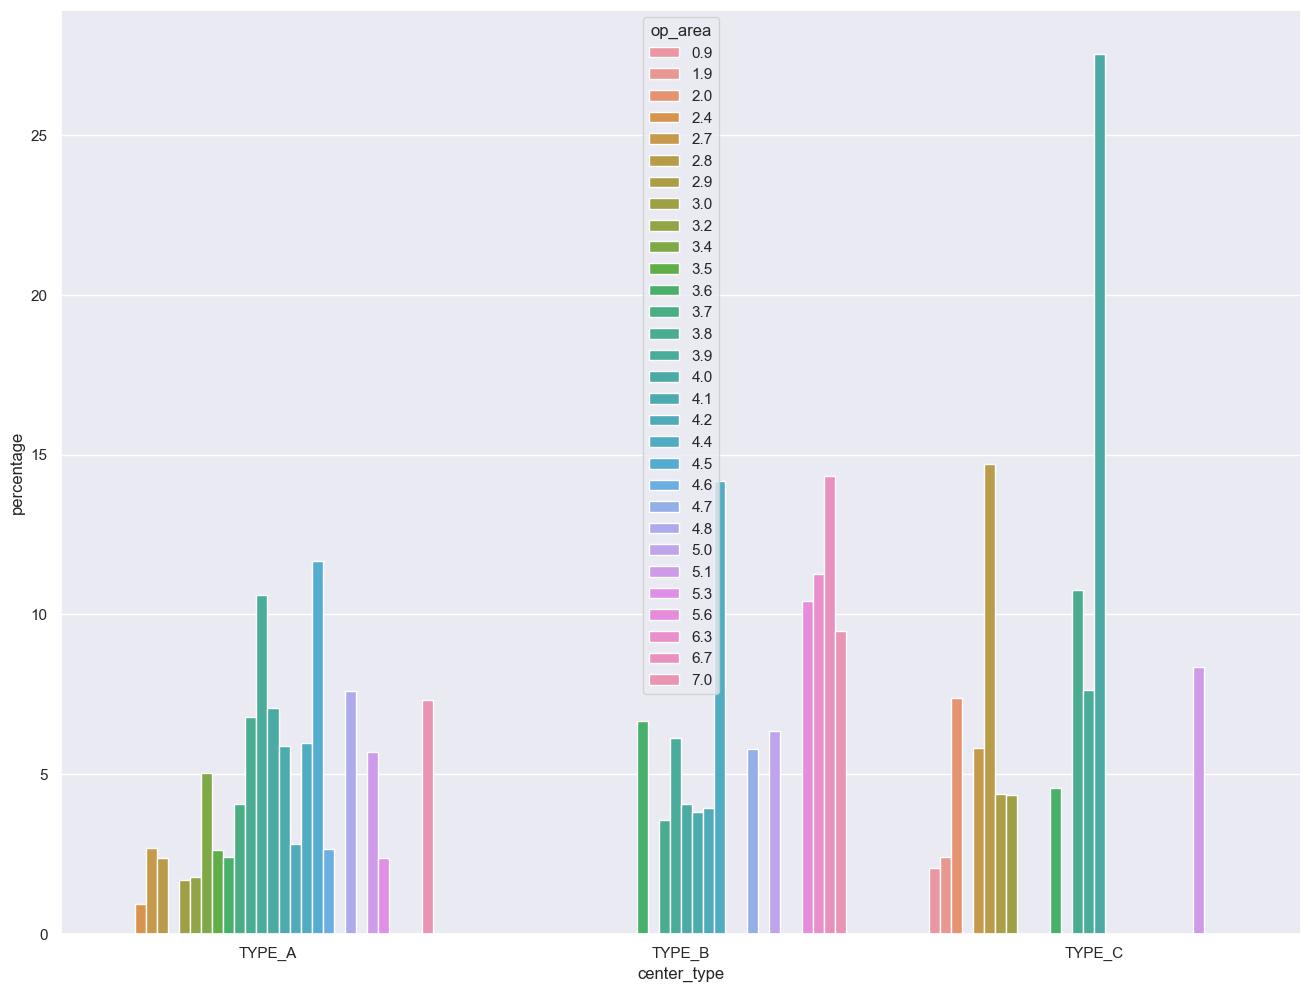

In [125]:
grouped_data_area = full_train_data.groupby(['center_type', 'op_area'])['num_orders'].sum().reset_index()
grouped_data_area = grouped_data_area.merge(total_orders_by_center, on='center_type', suffixes=('', '_total'))
grouped_data_area["percentage"] = grouped_data_area["num_orders"] / grouped_data_area["num_orders_total"] * 100
sns.barplot(x="center_type", y="percentage", hue="op_area", data=grouped_data_area)


Looking at the total orders grouped by center_type/op_area did not give any relevant insights.
Looking at the % also did not help. Each category has a different pattern.
Only thing worth mentioning is that TYPE_C, the lowest selling one has centers with small op_area(e.g. centers that ship on a very small distance around them)

Let's check if each center_type have the same distribution of op_area. We're curios to see if maybe TYPE_C have a lot of small op_area centers and if that's the reason its sales are lower.

<Axes: xlabel='center_type', ylabel='count'>

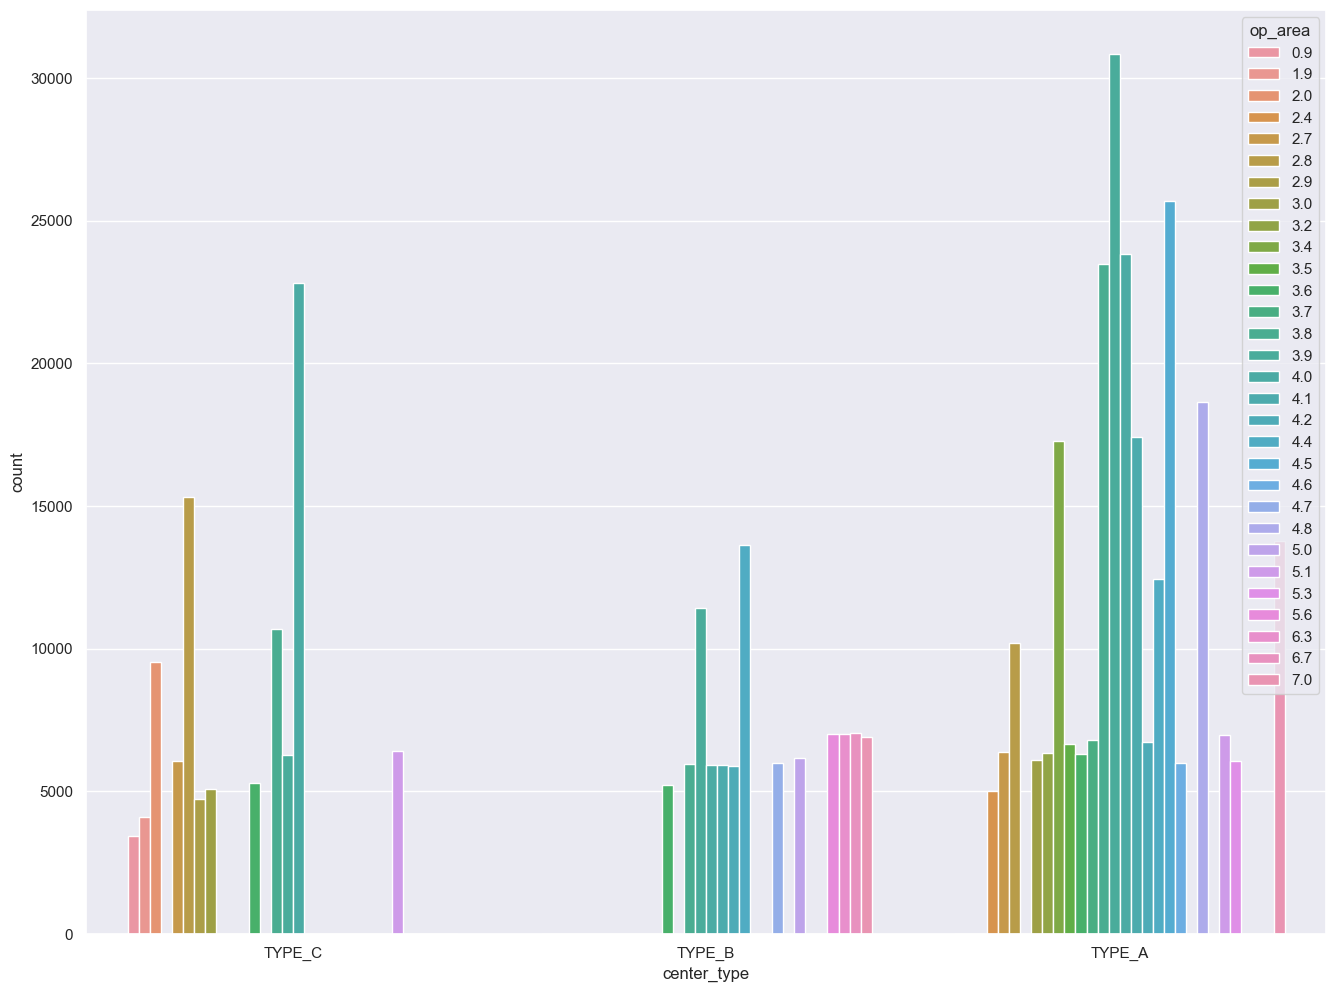

In [134]:
sns.countplot(x="center_type", hue="op_area", data=full_train_data)

Let's bin the op_area to work easily with it.

In [135]:
full_train_data['op_area_bin'] = pd.cut(full_train_data['op_area'], [0, 3.7, 4.5, 7],
                                    labels=['Small', 'Medium', 'Large'])


<Axes: xlabel='center_type', ylabel='count'>

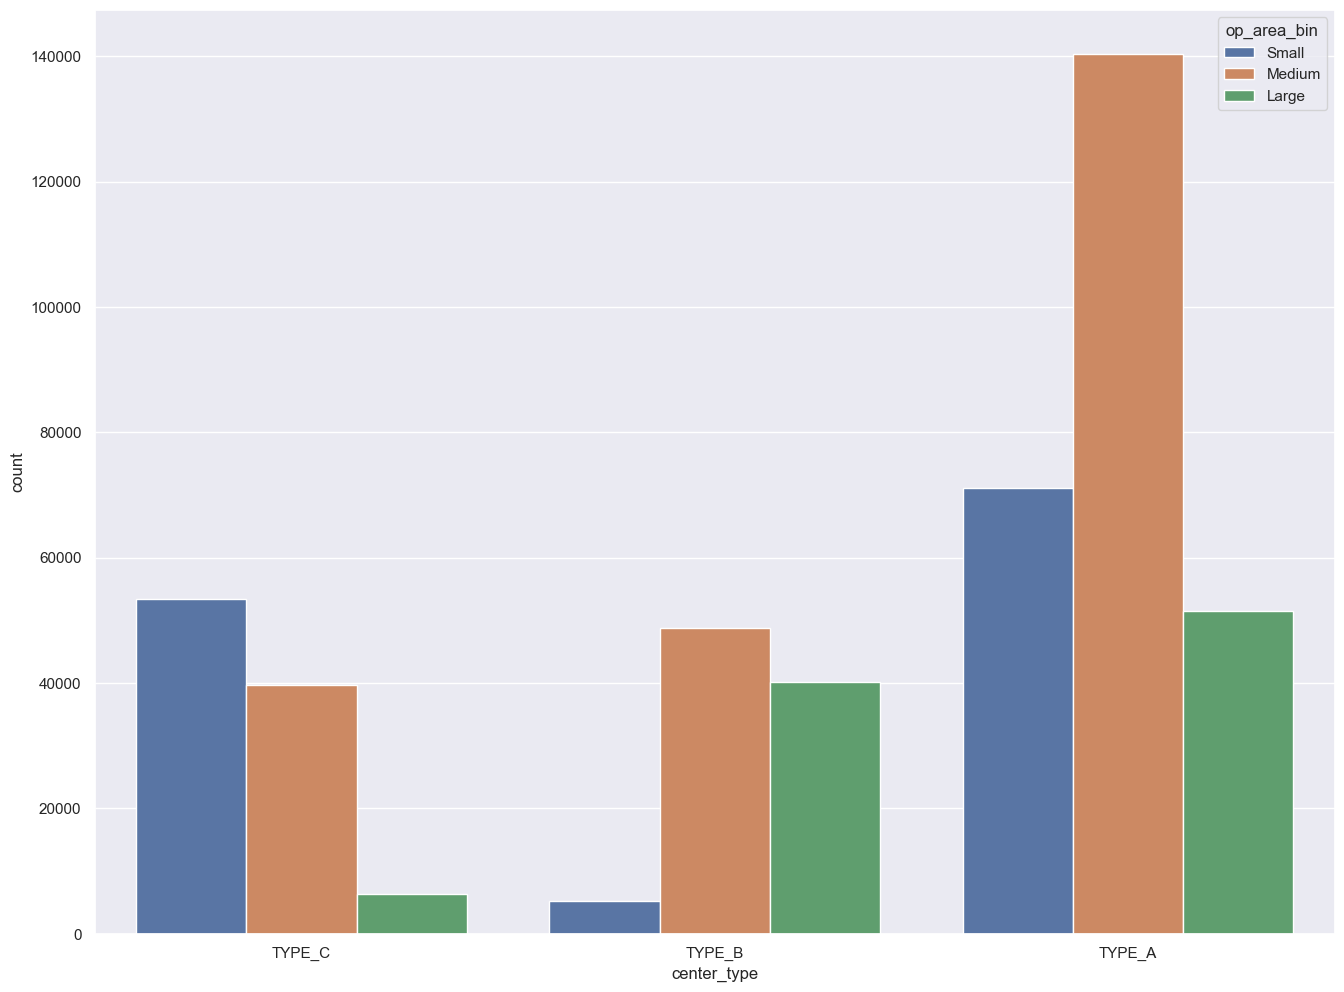

In [136]:
sns.countplot(x="center_type", hue="op_area_bin", data=full_train_data)


<Axes: xlabel='center_type', ylabel='percentage'>

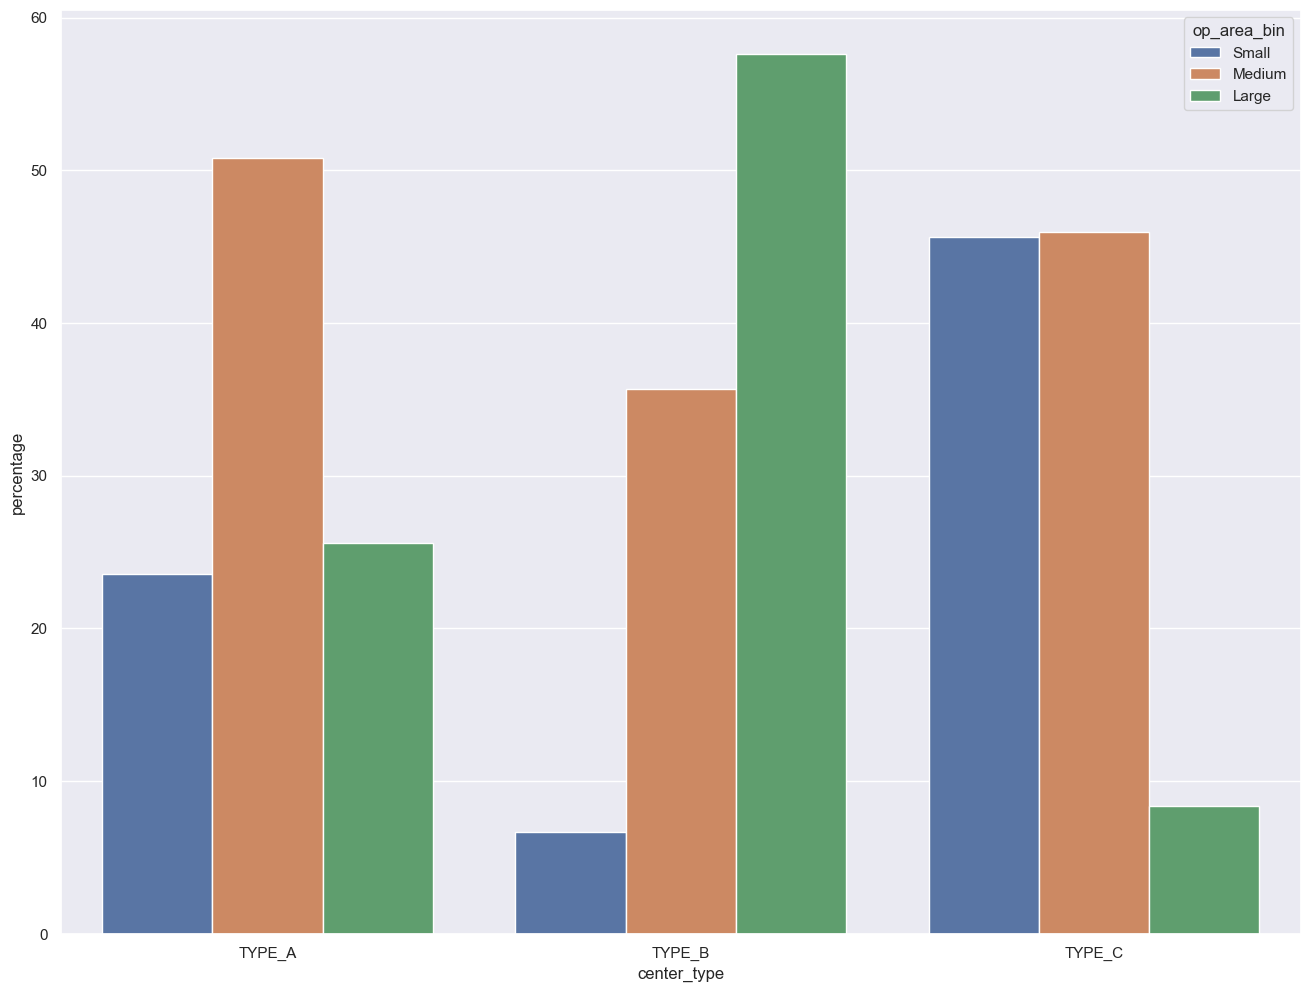

In [138]:
grouped_data_area_bin = full_train_data.groupby(['center_type', 'op_area_bin'])['num_orders'].sum().reset_index()
grouped_data_area_bin = grouped_data_area_bin.merge(total_orders_by_center, on='center_type', suffixes=('', '_total'))
grouped_data_area_bin["percentage"] = grouped_data_area_bin["num_orders"] / grouped_data_area_bin["num_orders_total"] * 100
sns.barplot(x="center_type", y="percentage", hue="op_area_bin", data=grouped_data_area_bin)


In [139]:
op_area_bin_encoded = pd.get_dummies(full_train_data['op_area_bin'], prefix='op_area')
op_area_bin_encoded


,op_area_Small,op_area_Medium,op_area_Large
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
...,...,...,...
456543,0,1,0
456544,0,1,0
456545,0,1,0
456546,0,1,0


In [144]:
full_train_data = pd.concat([full_train_data, op_area_bin_encoded], axis=1)

In [146]:
full_train_data


,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,city_code,region_code,center_type,op_area,category,cuisine,op_area_bin,op_area_Small,op_area_Medium,op_area_Large
0,1379560,1,55,1885,136.83,152.29,0,0,177,647,56,TYPE_C,2.0,Beverages,Thai,Small,1,0,0
1,1018704,2,55,1885,135.83,152.29,0,0,323,647,56,TYPE_C,2.0,Beverages,Thai,Small,1,0,0
2,1196273,3,55,1885,132.92,133.92,0,0,96,647,56,TYPE_C,2.0,Beverages,Thai,Small,1,0,0
3,1116527,4,55,1885,135.86,134.86,0,0,163,647,56,TYPE_C,2.0,Beverages,Thai,Small,1,0,0
4,1343872,5,55,1885,146.50,147.50,0,0,215,647,56,TYPE_C,2.0,Beverages,Thai,Small,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
456543,1437396,141,61,2104,583.03,630.53,0,1,13,473,77,TYPE_A,4.5,Fish,Continental,Medium,0,1,0
456544,1060716,142,61,2104,581.03,582.03,0,0,42,473,77,TYPE_A,4.5,Fish,Continental,Medium,0,1,0
456545,1029231,143,61,2104,583.03,581.03,0,0,40,473,77,TYPE_A,4.5,Fish,Continental,Medium,0,1,0
456546,1141147,144,61,2104,582.03,581.03,0,0,53,473,77,TYPE_A,4.5,Fish,Continental,Medium,0,1,0


In [152]:
new_corrs = full_train_data.corr()
new_corrs['num_orders']


C:\Users\Devy\AppData\Local\Temp\ipykernel_22280\1605709767.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  new_corrs = full_train_data.corr()


id                       0.000702
week                    -0.017210
center_id               -0.053035
meal_id                  0.010597
checkout_price          -0.282108
base_price              -0.222306
emailer_for_promotion    0.277147
homepage_featured        0.294490
num_orders               1.000000
city_code                0.041596
region_code              0.029744
op_area                  0.176976
op_area_Small           -0.077519
op_area_Medium          -0.052073
op_area_Large            0.148609
Name: num_orders, dtype: float64